### Download data

- https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD&guccounter=1


In [2]:
import yfinance as yf

# Fetch BTC historical data
btc = yf.Ticker("BTC-USD")
df = btc.history(period="max")  # Fetch all available data

# Save as CSV
df.to_csv("dataset/btc_historical_data.csv")

print("BTC historical data downloaded successfully!")

BTC historical data downloaded successfully!


### Import necessary Libraries

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mutual_info_score

import re
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

### Load Dataset


In [6]:
data = pd.read_csv('dataset/btc_historical_data.csv')
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
1,2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2,2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
3,2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
4,2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0


In [7]:
data.shape

(3793, 8)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3793 entries, 0 to 3792
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3793 non-null   object 
 1   Open          3793 non-null   float64
 2   High          3793 non-null   float64
 3   Low           3793 non-null   float64
 4   Close         3793 non-null   float64
 5   Volume        3793 non-null   int64  
 6   Dividends     3793 non-null   float64
 7   Stock Splits  3793 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 237.2+ KB


In [9]:
data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3793.000000,3793.000000,3793.000000,3793.000000,3.793000e+03,3793.0,3793.0
mean,20281.215010,20736.034971,19807.754516,20306.093749,1.891093e+10,0.0,0.0
std,23264.128353,23770.582242,22743.923113,23295.704887,2.069788e+10,0.0,0.0
min,176.897003,211.731003,171.509995,178.102997,5.914570e+06,0.0,0.0
25%,1254.290039,1275.550049,1239.750000,1265.489990,4.773380e+08,0.0,0.0
50%,9454.266602,9643.216797,9260.694336,9461.058594,1.483742e+10,0.0,0.0
75%,32129.408203,33292.453125,30681.496094,32127.267578,3.006664e+10,0.0,0.0
max,106147.296875,109114.882812,105291.734375,106146.265625,3.509679e+11,0.0,0.0


In [10]:
data.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [11]:
data.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

### EDA


In [12]:
data.columns = data.columns.str.replace(' ', '_').str.lower()
data.head()

,date,open,high,low,close,volume,dividends,stock_splits
0,2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
1,2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2,2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
3,2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
4,2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0


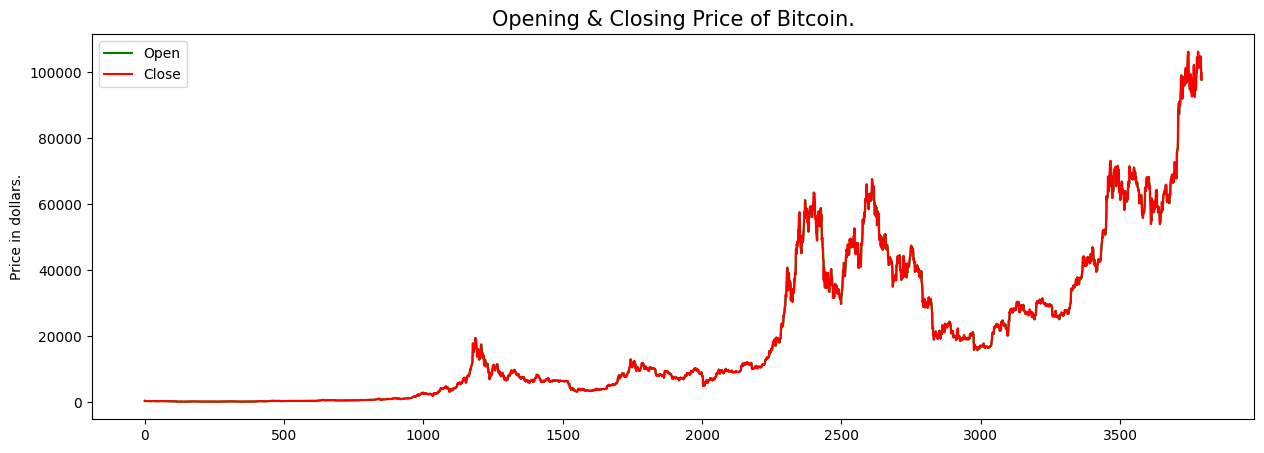

In [13]:

plt.figure(figsize=(15, 5))
plt.plot(data['open'], color='green', label='Open')
plt.plot(data['close'], color='red', label='Close')
plt.title('Opening & Closing Price of Bitcoin.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.legend()
plt.show()

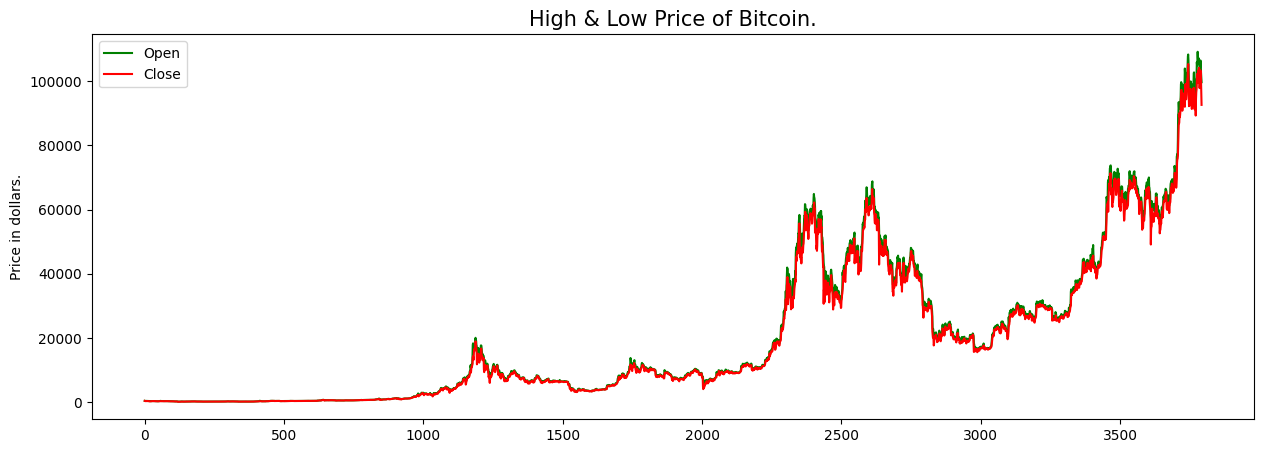

In [14]:
plt.figure(figsize=(15, 5))
plt.plot(data['high'], color='green', label='Open')
plt.plot(data['low'], color='red', label='Close')
plt.title('High & Low Price of Bitcoin.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.legend()
plt.show()

In [16]:
num_features = ['open', 'high', 'low', 'close']
data[num_features].corr()

,open,high,low,close
open,1.000000,0.999596,0.999410,0.999145
high,0.999596,1.000000,0.999285,0.999638
low,0.999410,0.999285,1.000000,0.999550
close,0.999145,0.999638,0.999550,1.000000


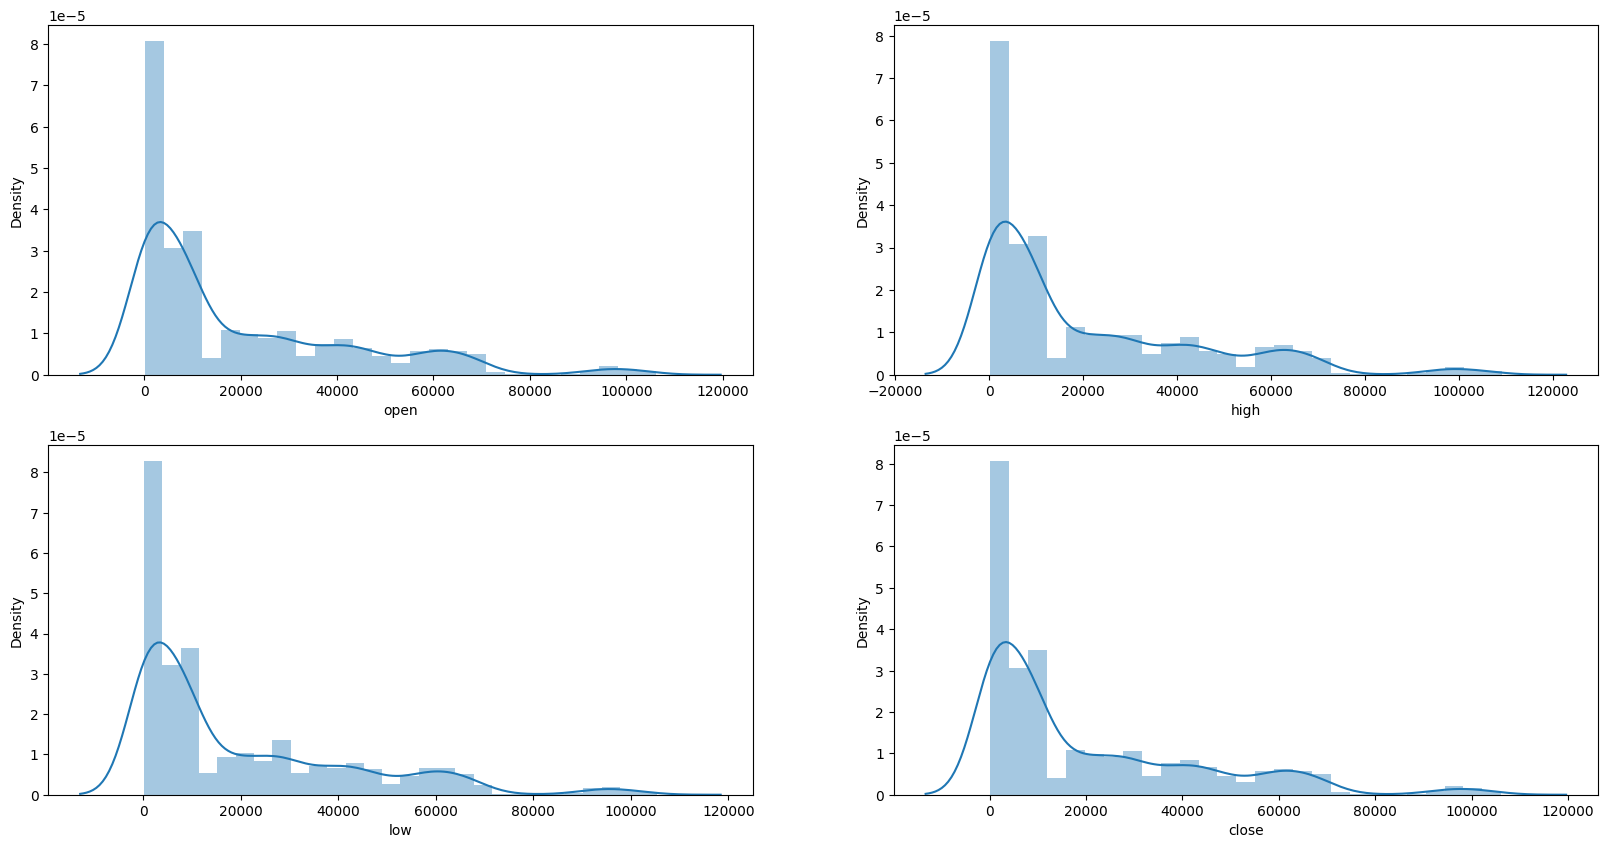

In [17]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
for i, (col, ax) in enumerate(zip(num_features, axes.flatten())):
    sns.distplot(data[col], ax=ax)

plt.show()

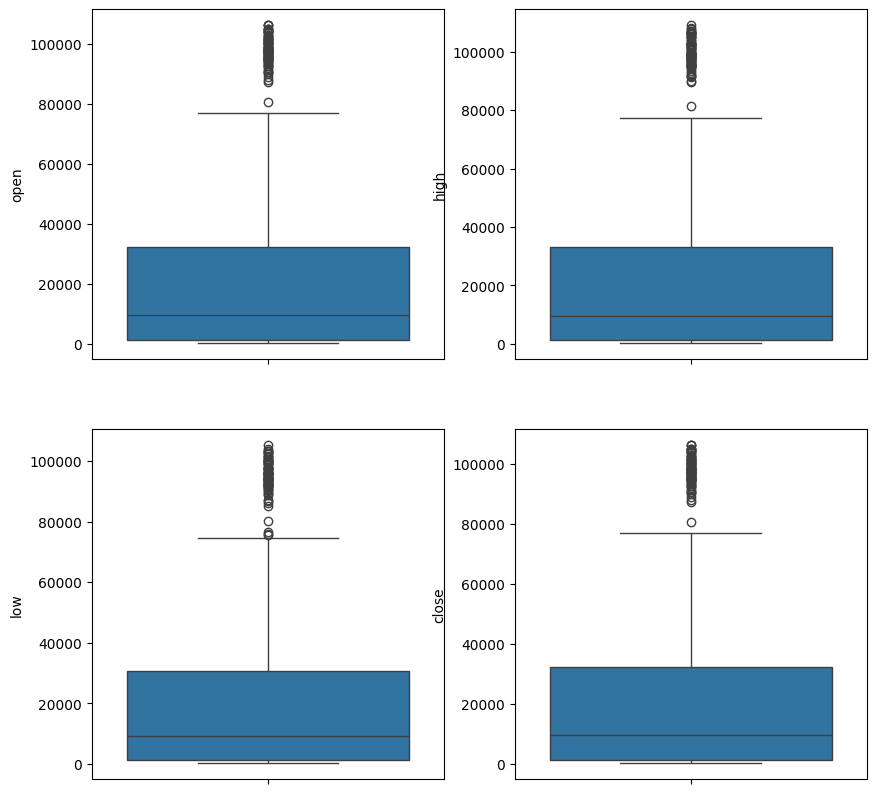

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
for i, (col, ax) in enumerate(zip(num_features, axes.flatten())):
    sns.boxplot(data[col], ax=ax)

plt.show()

### Prepare data for classification

Attach a label to each movement:

- 1 if the signal is that short term price will go up as compared to the long term.
- 0 if the signal is that short term price will go down as compared to the long term.


In [ ]:
df = data.copy()
df['date'] = pd.to_datetime(df.date)
df.drop(columns=["dividends", "stock_splits"], inplace=True)
df.head()

,date,open,high,low,close,volume
0,2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800
1,2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200
2,2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700
3,2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600
4,2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100


In [26]:
# Initialize the `signals` DataFrame with the `signal` column

# Create short simple moving average over the short window
df['short_mavg'] = df['close'].rolling(
    window=10, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
df['long_mavg'] = df['close'].rolling(
    window=60, min_periods=1, center=False).mean()

# Create signals
df['signals'] = np.where(df['short_mavg'] > df['long_mavg'], 1, 0)

In [27]:
df.head()

,date,open,high,low,close,volume,short_mavg,long_mavg,signals
0,2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,457.334015,457.334015,0
1,2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,440.887009,440.887009,0
2,2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,425.523336,425.523336,0
3,2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,421.368500,421.368500,0
4,2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,416.859003,416.859003,0


In [28]:
df.tail()

,date,open,high,low,close,volume,short_mavg,long_mavg,signals
3788,2025-01-30 00:00:00+00:00,103709.335938,106418.765625,103321.648438,104735.304688,41915744521,103783.482031,99088.581250,1
3789,2025-01-31 00:00:00+00:00,104737.562500,106026.351562,101543.882812,102405.023438,45732764360,103409.357813,99197.576563,1
3790,2025-02-01 00:00:00+00:00,102402.796875,102755.726562,100297.710938,100655.906250,27757944848,103109.641406,99275.138932,1
3791,2025-02-02 00:00:00+00:00,100661.539062,101430.664062,96216.078125,97688.976562,63091816853,102482.521875,99257.146354,1
3792,2025-02-03 00:00:00+00:00,97618.640625,99649.414062,92584.960938,99649.414062,116051533824,101965.514844,99308.077083,1


In [29]:
df[df['signals'] == 1].shape, df[df['signals'] == 0].shape

((2149, 9), (1644, 9))

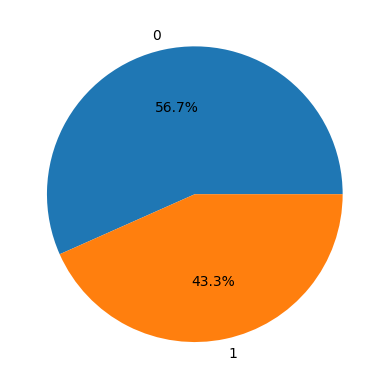

In [30]:
plt.pie(df['signals'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

### Feature Engineering


Constructing a dataset that contains the predictors which will be used to make the predictions, and the output variable.

The current Data of the bicoin consists of date, open, high, low, close and volume. Using this data we calculate the following technical indicators:

- Moving Average : A moving average provides an indication of the trend of the price movement by cut down the amount of "noise" on a price chart.
- Stochastic Oscillator %K and %D : A stochastic oscillator is a momentum indicator comparing a particular closing price of a security to a range of its prices over a certain period of time. %K and %D are slow and fast indicators.
- Relative Strength Index(RSI) :It is a momentum indicator that measures the magnitude of recent price changes to evaluate overbought or oversold conditions in the price of a stock or other asset.
- Rate Of Change(ROC): It is a momentum oscillator, which measures the percentage change between the current price and the n period past price.
  Momentum (MOM) : It is the rate of acceleration of a security's price or volume – that is, the speed at which the price is changing.


In [31]:
df.head()

,date,open,high,low,close,volume,short_mavg,long_mavg,signals
0,2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,457.334015,457.334015,0
1,2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,440.887009,440.887009,0
2,2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,425.523336,425.523336,0
3,2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,421.368500,421.368500,0
4,2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,416.859003,416.859003,0


In [32]:
# calculation of exponential moving average
def EMA(df, n):
    EMA = pd.Series(df['close'].ewm(
        span=n, min_periods=n).mean(), name='EMA_' + str(n))
    return EMA


df['EMA7'] = EMA(df, 7)
df['EMA14'] = EMA(df, 14)
df['EMA30'] = EMA(df, 30)
df.head()

,date,open,high,low,close,volume,short_mavg,long_mavg,signals,EMA7,EMA14,EMA30
0,2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,457.334015,457.334015,0,NaN,NaN,NaN
1,2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,440.887009,440.887009,0,NaN,NaN,NaN
2,2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,425.523336,425.523336,0,NaN,NaN,NaN
3,2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,421.368500,421.368500,0,NaN,NaN,NaN
4,2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,416.859003,416.859003,0,NaN,NaN,NaN


In [33]:
# calculation of rate of change
def ROC(df, n):
    M = df.diff(n - 1)
    N = df.shift(n - 1)
    ROC = pd.Series(((M / N) * 100), name='ROC_' + str(n))
    return ROC

df['ROC7'] = ROC(df['close'], 7)
df['ROC14'] = ROC(df['close'], 14)
df['ROC30'] = ROC(df['close'], 30)
df.head()

,date,open,high,low,close,volume,short_mavg,long_mavg,signals,EMA7,EMA14,EMA30,ROC7,ROC14,ROC30
0,2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,457.334015,457.334015,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,440.887009,440.887009,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,425.523336,425.523336,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,421.368500,421.368500,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,416.859003,416.859003,0,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# Calculation of price momentum
def MOM(df, n):
    MOM = pd.Series(df.diff(n), name='Momentum_' + str(n))
    return MOM

df['MOM7'] = MOM(df['close'], 7)
df['MOM14'] = MOM(df['close'], 14)
df['MOM30'] = MOM(df['close'], 30)
df.head()

,date,open,high,low,close,volume,short_mavg,long_mavg,signals,EMA7,EMA14,EMA30,ROC7,ROC14,ROC30,MOM7,MOM14,MOM30
0,2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,457.334015,457.334015,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,440.887009,440.887009,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,425.523336,425.523336,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,421.368500,421.368500,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,416.859003,416.859003,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# calculation of relative strength index
def RSI(series, period):
    delta = series.diff().dropna()
    u = delta * 0
    d = u.copy()
    u[delta > 0] = delta[delta > 0]
    d[delta < 0] = -delta[delta < 0]
    # first value is sum of avg gains
    u[u.index[period-1]] = np.mean(u[:period])
    u = u.drop(u.index[:(period-1)])
    # first value is sum of avg losses
    d[d.index[period-1]] = np.mean(d[:period])
    d = d.drop(d.index[:(period-1)])
    rs = u.ewm(com=period-1, adjust=False).mean() / \
        d.ewm(com=period-1, adjust=False).mean()
    return 100 - 100 / (1 + rs)


df['RSI7'] = RSI(df['close'], 7)
df['RSI14'] = RSI(df['close'], 14)
df['RSI30'] = RSI(df['close'], 30)
df.head()

,date,open,high,low,close,volume,short_mavg,long_mavg,signals,EMA7,...,EMA30,ROC7,ROC14,ROC30,MOM7,MOM14,MOM30,RSI7,RSI14,RSI30
0,2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,457.334015,457.334015,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,440.887009,440.887009,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,425.523336,425.523336,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,421.368500,421.368500,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,416.859003,416.859003,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# calculation of stochastic osillator.
def STOK(close, low, high, n):
    STOK = ((close - low.rolling(n).min()) /
            (high.rolling(n).max() - low.rolling(n).min())) * 100
    return STOK


def STOD(close, low, high, n):
    STOK = ((close - low.rolling(n).min()) /
            (high.rolling(n).max() - low.rolling(n).min())) * 100
    STOD = STOK.rolling(3).mean()
    return STOD


df['%K7'] = STOK(df['close'], df['low'], df['high'], 7)
df['%D7'] = STOD(df['close'], df['low'], df['high'], 7)

df['%K14'] = STOK(df['close'], df['low'], df['high'], 14)
df['%D14'] = STOD(df['close'], df['low'], df['high'], 14)

df['%K30'] = STOK(df['close'], df['low'], df['high'], 30)
df['%D30'] = STOD(df['close'], df['low'], df['high'], 30)
df.head()

,date,open,high,low,close,volume,short_mavg,long_mavg,signals,EMA7,...,MOM30,RSI7,RSI14,RSI30,%K7,%D7,%K14,%D14,%K30,%D30
0,2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,457.334015,457.334015,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,440.887009,440.887009,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,425.523336,425.523336,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,421.368500,421.368500,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,416.859003,416.859003,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df.isnull().sum()

date           0
open           0
high           0
low            0
close          0
volume         0
short_mavg     0
long_mavg      0
signals        0
EMA7           6
EMA14         13
EMA30         29
ROC7           6
ROC14         13
ROC30         29
MOM7           7
MOM14         14
MOM30         30
RSI7           7
RSI14         14
RSI30         30
%K7            6
%D7            8
%K14          13
%D14          15
%K30          29
%D30          31
dtype: int64

In [38]:
df = df.dropna(axis=0)
df.shape

(3762, 27)

In [39]:
df.reset_index(drop=True, inplace=True)
df.head()

,date,open,high,low,close,volume,short_mavg,long_mavg,signals,EMA7,...,MOM30,RSI7,RSI14,RSI30,%K7,%D7,%K14,%D14,%K30,%D30
0,2014-10-18 00:00:00+00:00,383.976013,395.157990,378.971008,391.441986,11416800,381.124902,384.330750,0,384.529977,...,-32.998016,60.168123,48.822767,41.288909,63.538148,54.600927,83.451242,78.938795,67.086112,58.531964
1,2014-10-19 00:00:00+00:00,391.253998,393.938995,386.457001,389.545990,5914570,383.576901,384.488788,0,385.784075,...,-5.250000,58.119154,48.175445,41.067700,48.244175,53.887679,79.702754,80.109191,65.840884,63.100228
2,2014-10-20 00:00:00+00:00,389.230988,390.084015,378.252014,382.845001,16419000,385.705200,384.440441,1,385.049265,...,-26.058990,50.963108,45.861098,40.278711,25.305468,45.695930,68.368493,77.174163,61.439897,64.788964
3,2014-10-21 00:00:00+00:00,382.420990,392.645996,380.834015,386.475006,14188900,388.122800,384.498572,1,385.405715,...,-12.346008,54.503466,47.337013,40.914833,45.975261,39.841635,70.153841,72.741696,63.823964,63.701582
4,2014-10-22 00:00:00+00:00,386.118011,388.575989,382.248993,383.157990,11641300,388.583698,384.461333,1,384.843766,...,-18.994019,50.608240,46.100267,40.506979,39.196419,36.825716,55.413890,64.645408,61.645457,62.303106


In [43]:
df['year'] = df.date.dt.year

# df['month'] = df.date.dt.month
# df['day'] = df.date.dt.day
# df['quarter'] = df.date.dt.quarter
# df['day_of_week'] = df['date'].dt.dayofweek
# df['is_weekend'] = df['date'].dt.dayofweek.isin([5, 6]).astype(int)  # 1 for weekend, 0 for weekdays

# del df['date']

In [52]:
features = [
    'EMA7',
    'EMA14',
    'EMA30',
    'ROC7',
    'ROC14',
    'ROC30',
    'MOM7',
    'MOM14',
    'MOM30',
    'RSI7',
    'RSI14',
    'RSI30',
    '%K7',
    '%D7',
    '%K14',
    '%D14',
    '%K30',
    '%D30'
    ]

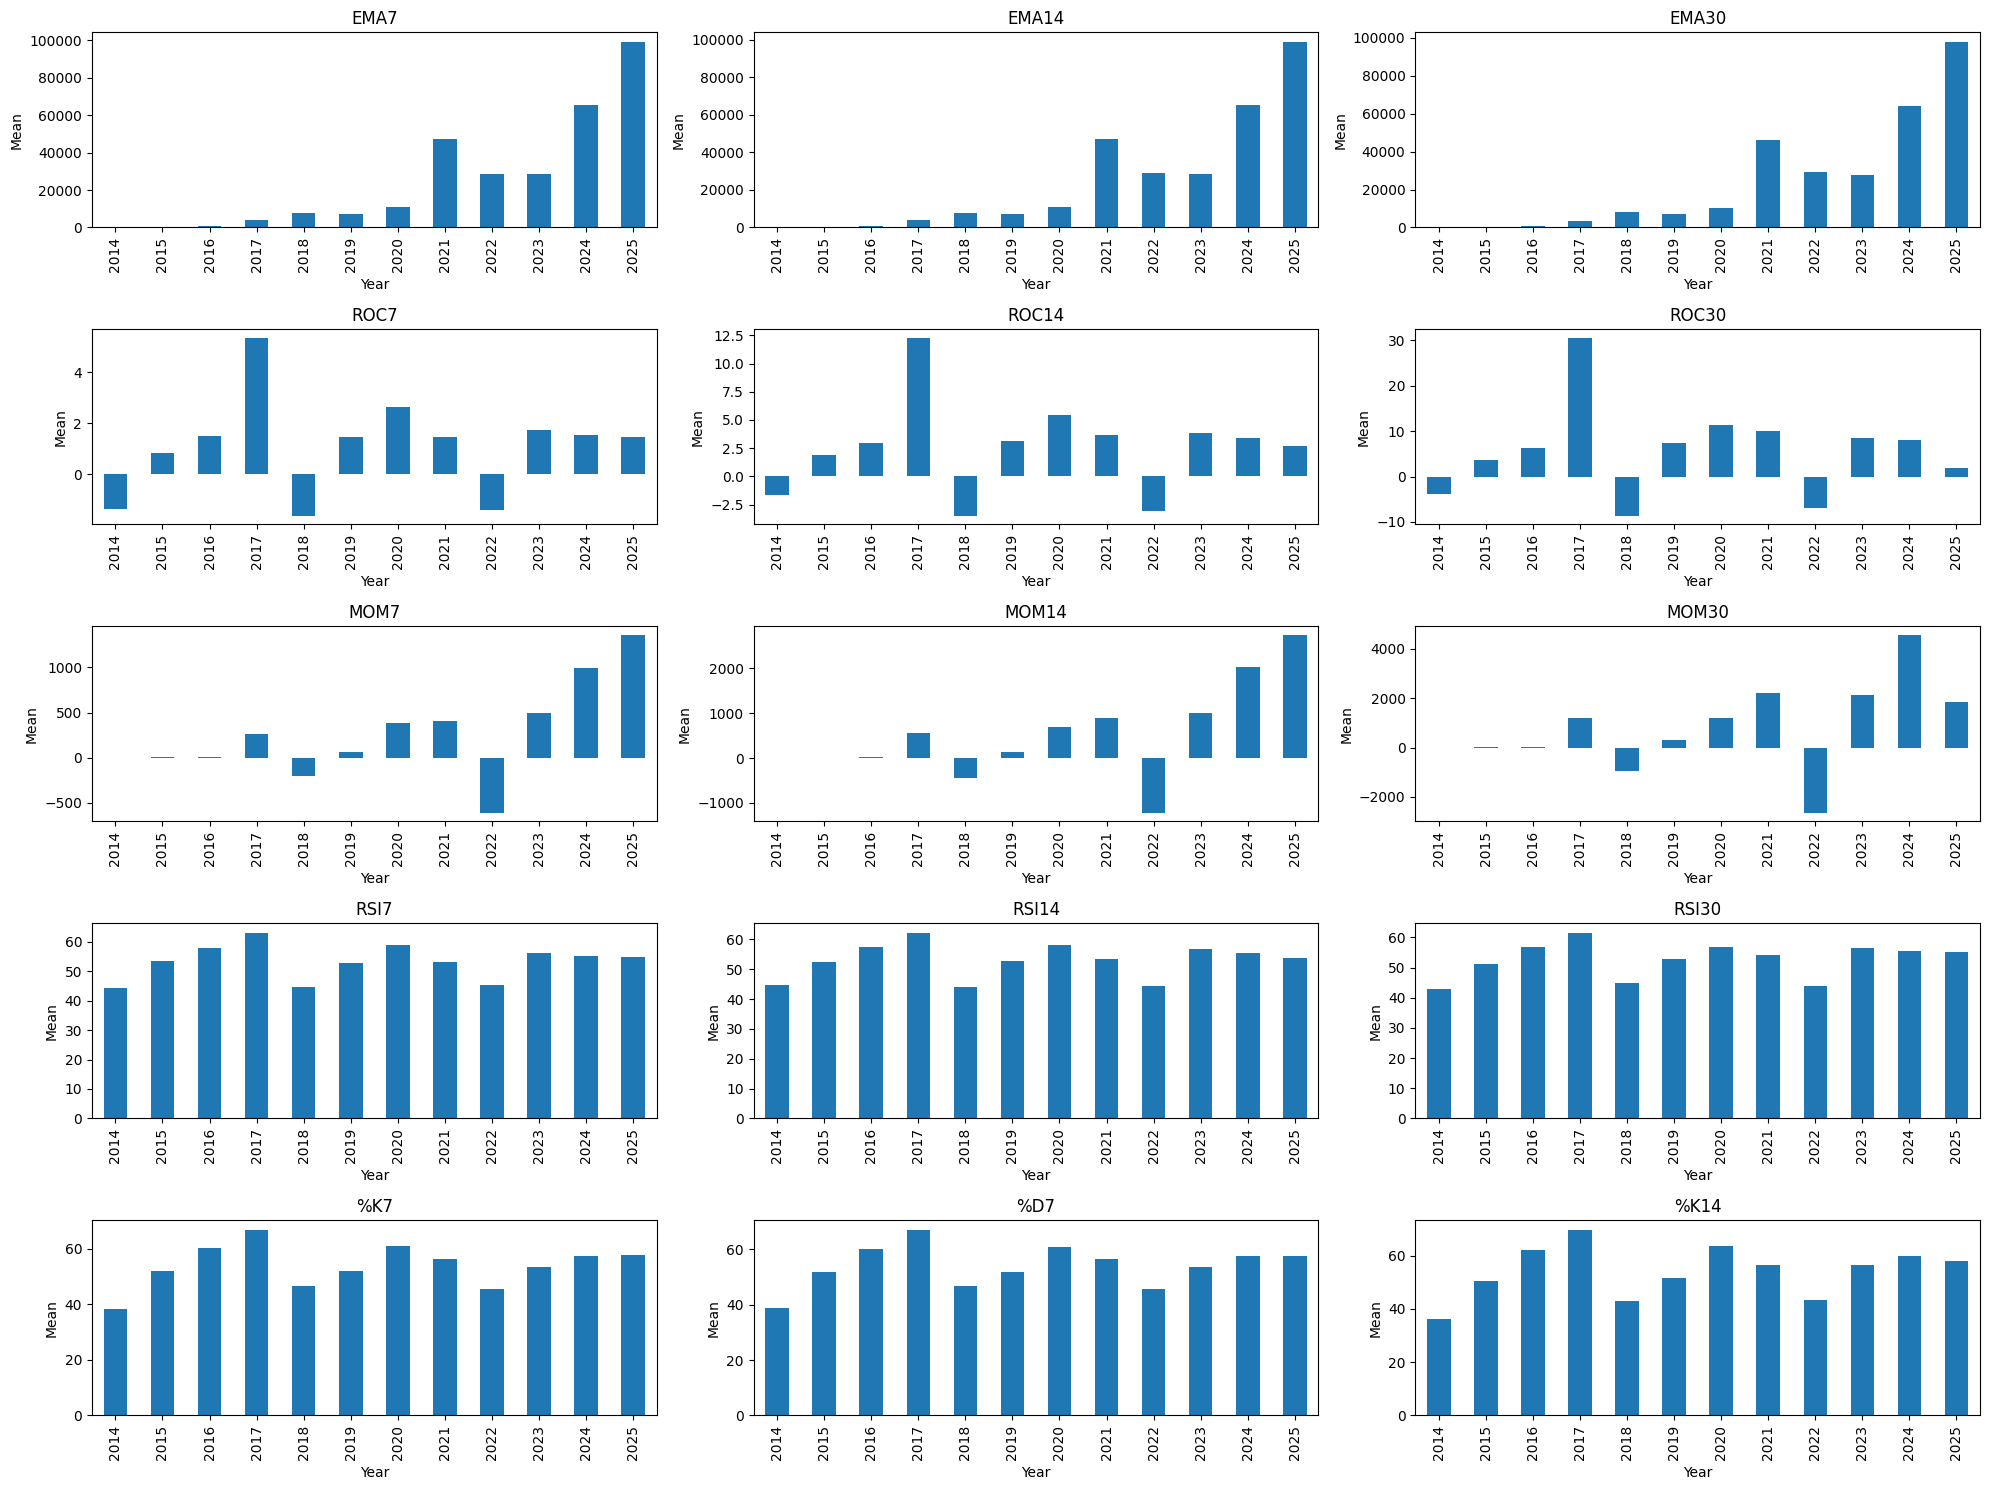

In [53]:
data_grouped = df.groupby('year')[features].mean()

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 15))
for i, (col, ax) in enumerate(zip(features, axes.flatten())):
    data_grouped[col].plot(kind='bar', ax=ax)
    ax.set_title(col)
    ax.set_ylabel('Mean')
    ax.set_xlabel('Year')

plt.tight_layout()
plt.show()

In [54]:
df.isnull().sum()

date          0
open          0
high          0
low           0
close         0
volume        0
short_mavg    0
long_mavg     0
signals       0
EMA7          0
EMA14         0
EMA30         0
ROC7          0
ROC14         0
ROC30         0
MOM7          0
MOM14         0
MOM30         0
RSI7          0
RSI14         0
RSI30         0
%K7           0
%D7           0
%K14          0
%D14          0
%K30          0
%D30          0
year          0
dtype: int64

In [55]:
df.tail()

,date,open,high,low,close,volume,short_mavg,long_mavg,signals,EMA7,...,RSI7,RSI14,RSI30,%K7,%D7,%K14,%D14,%K30,%D30,year
3757,2025-01-30 00:00:00+00:00,103709.335938,106418.765625,103321.648438,104735.304688,41915744521,103783.482031,99088.581250,1,103386.729918,...,61.567270,58.821003,57.482249,74.595922,58.704603,61.307542,51.184064,77.941947,70.496349,2025
3758,2025-01-31 00:00:00+00:00,104737.562500,106026.351562,101543.882812,102405.023438,45732764360,103409.357813,99197.576563,1,103141.303298,...,48.547572,52.877261,54.846226,53.452137,63.849770,40.720101,51.990859,66.205322,72.297001,2025
3759,2025-02-01 00:00:00+00:00,102402.796875,102755.726562,100297.710938,100655.906250,27757944848,103109.641406,99275.138932,1,102519.954036,...,40.961982,48.884325,52.960405,33.167410,53.738490,25.267096,42.431580,57.395771,67.181013,2025
3760,2025-02-02 00:00:00+00:00,100661.539062,101430.664062,96216.078125,97688.976562,63091816853,102482.521875,99257.146354,1,101312.209668,...,31.287499,42.958539,49.946887,14.436377,33.685308,11.418875,25.802024,42.452621,55.351238,2025
3761,2025-02-03 00:00:00+00:00,97618.640625,99649.414062,92584.960938,99649.414062,116051533824,101965.514844,99308.077083,1,100896.510766,...,41.871059,47.488181,51.820807,51.066596,32.890128,48.400055,28.362009,52.326502,50.724964,2025


In [56]:
features_columns = features

result = {}

for feature in features_columns:
    correlation = df[[feature]].corrwith(df.signals)
    result[feature] = correlation[feature]
    
    
corr_df = pd.DataFrame(result.items(), columns=['Feature', 'Correlation with Target'])
corr_df

,Feature,Correlation with Target
0,EMA7,0.073965
1,EMA14,0.061749
2,EMA30,0.034017
3,ROC7,0.189451
4,ROC14,0.400772
5,ROC30,0.604653
6,MOM7,0.156478
7,MOM14,0.322173
8,MOM30,0.476567
9,RSI7,0.404976


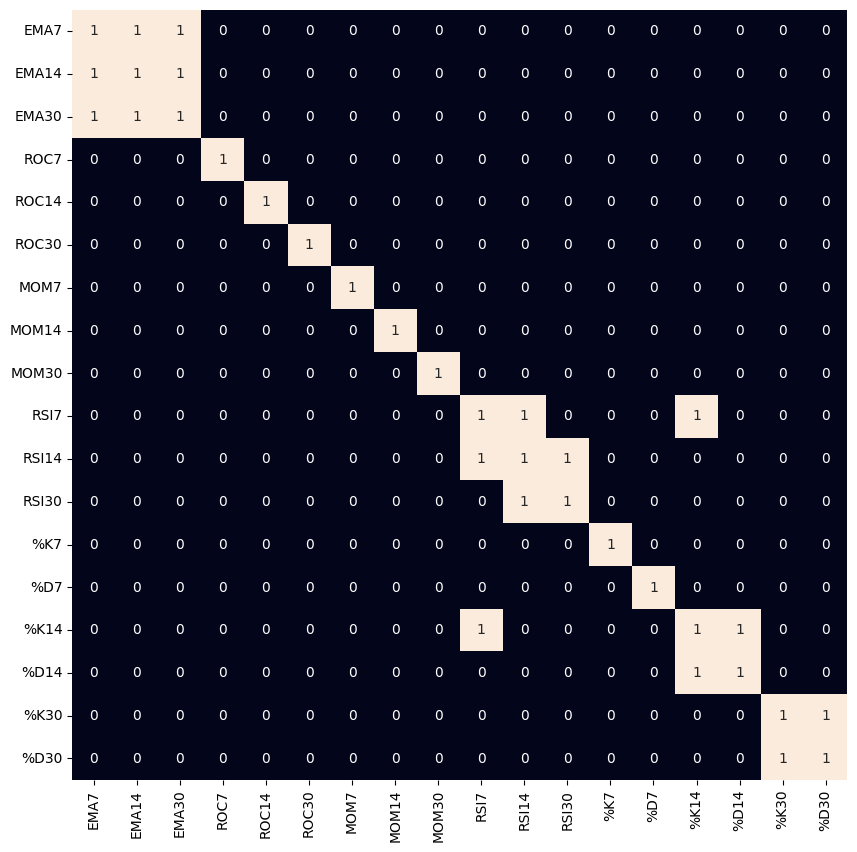

In [57]:
#@ visualize heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df[features_columns].corr() > 0.9, annot=True, cbar=False)
plt.show()

In [58]:
# split_data
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

len(df_train), len(df_val), len(df_test)

(2821, 941, 753)

In [59]:
# def split_dataframe(df, train_fraction=0.8):
#     split_index = int(train_fraction * len(df))
#     df_train = df[:split_index].reset_index(drop=True)
#     df_test = df[split_index:].reset_index(drop=True)
#     return df_train, df_test


# df_train_full, df_test = split_dataframe(df, train_fraction=0.8)
# df_train, df_val = split_dataframe(df_train_full, train_fraction=0.75)

# len(df_train), len(df_val), len(df_test)

In [60]:
y_train = df_train.signals.values
y_val = df_val.signals.values
y_test = df_test.signals.values

### Model Training and Evaluation

In [61]:
train_dict = df_train[features].to_dict(orient="records")
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(df_train[features])

#### Logistic Regression

In [65]:
# Train logistic regression model
model = LogisticRegression(solver='liblinear', C=10,
                           max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [206]:
val_dict = df_val[features].to_dict(orient='records')
X_val = dv.transform(val_dict)

# X_val = scaler.transform(df_val[features])

y_pred = model.predict(X_val)
accuracy = np.round(accuracy_score(y_val, y_pred), 2)
print("Accuracy:", accuracy)

TypeError: ('Expecting data to be a DMatrix object, got: ', <class 'numpy.ndarray'>)

### Feature importance

In [67]:
orig_score = accuracy
    
# Evaluate feature importance
print("Feature Importance Analysis:")
for col in features:
    subset = features.copy()
    subset.remove(col)

    train_dict = df_train[subset].to_dict(orient="records")
    val_dict = df_val[subset].to_dict(orient="records")

    dv.fit(train_dict)
    X_train = dv.transform(train_dict)
    X_val = dv.transform(val_dict)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    score = accuracy_score(y_val, y_pred)
    print(f"Feature '{col}': Accuracy Drop = {orig_score - score:.4f}, New Accuracy = {score:.4f}")

Feature Importance Analysis:
Feature 'EMA7': Accuracy Drop = 0.0208, New Accuracy = 0.9192
Feature 'EMA14': Accuracy Drop = 0.0558, New Accuracy = 0.8842
Feature 'EMA30': Accuracy Drop = 0.0856, New Accuracy = 0.8544
Feature 'ROC7': Accuracy Drop = -0.0016, New Accuracy = 0.9416
Feature 'ROC14': Accuracy Drop = 0.0016, New Accuracy = 0.9384
Feature 'ROC30': Accuracy Drop = 0.0070, New Accuracy = 0.9330
Feature 'MOM7': Accuracy Drop = -0.0026, New Accuracy = 0.9426
Feature 'MOM14': Accuracy Drop = 0.0038, New Accuracy = 0.9362
Feature 'MOM30': Accuracy Drop = 0.0048, New Accuracy = 0.9352
Feature 'RSI7': Accuracy Drop = -0.0016, New Accuracy = 0.9416
Feature 'RSI14': Accuracy Drop = 0.0006, New Accuracy = 0.9394
Feature 'RSI30': Accuracy Drop = -0.0026, New Accuracy = 0.9426
Feature '%K7': Accuracy Drop = -0.0026, New Accuracy = 0.9426
Feature '%D7': Accuracy Drop = 0.0006, New Accuracy = 0.9394
Feature '%K14': Accuracy Drop = -0.0026, New Accuracy = 0.9426
Feature '%D14': Accuracy Drop

#### Decision Tree

In [68]:
# Training Decision Tree Model
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [69]:
print(export_text(dt, feature_names=dv.feature_names_))

|--- RSI30 <= 50.29
|   |--- RSI30 <= 47.33
|   |   |--- class: 0
|   |--- RSI30 >  47.33
|   |   |--- class: 0
|--- RSI30 >  50.29
|   |--- MOM30 <= -108.44
|   |   |--- class: 1
|   |--- MOM30 >  -108.44
|   |   |--- class: 1



In [205]:
y_pred = dt.predict(X_val)
acc = accuracy_score(y_val, y_pred)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("ROC AUC:", roc_auc_score(y_val, y_pred))

Accuracy: 0.869287991498406
ROC AUC: 0.8674184261036468


#### Random Foresest Classifier

In [91]:
# Training Random Forest Model
rf = RandomForestClassifier(n_estimators=10, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

In [204]:
y_pred = rf.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("ROC AUC:", roc_auc_score(y_val, y_pred))

Accuracy: 0.9426142401700319
ROC AUC: 0.9412530847271731


Training models with different tree counts...


100%|██████████| 20/20 [00:06<00:00,  2.91it/s]


Best number of trees: 10.0 with accuracy: 0.9458


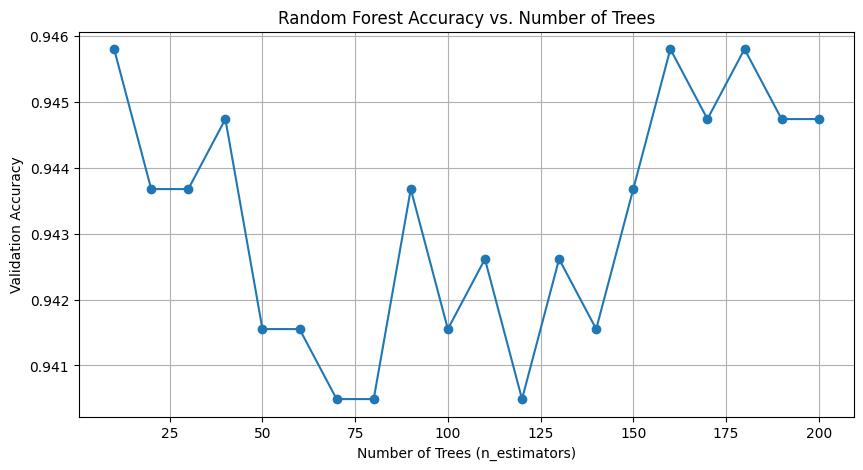

In [85]:
# Finding the best number of trees
scores = []
n_values = list(range(10, 201, 10))

print("Training models with different tree counts...")
for n in tqdm(n_values):
    rf = RandomForestClassifier(n_estimators=n, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_val)
    score = accuracy_score(y_val, y_pred)
    
    scores.append((n, score))

# Convert results to DataFrame
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'accuracy'])

# Find the best number of trees
best_model = df_scores.loc[df_scores['accuracy'].idxmax()]
best_n_estimators = best_model['n_estimators']
best_accuracy = best_model['accuracy']

print(f"\nBest number of trees: {best_n_estimators} with accuracy: {best_accuracy:.4f}")

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(df_scores["n_estimators"], df_scores["accuracy"], marker='o', linestyle='-')
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Validation Accuracy")
plt.title("Random Forest Accuracy vs. Number of Trees")
plt.grid(True)
plt.show()

Training models with different max_depth and n_estimators...


Max Depth: 100%|██████████| 5/5 [00:09<00:00,  1.92s/it]



Best max_depth: 10.0 and n_estimators: 60.0 with accuracy: 0.9501


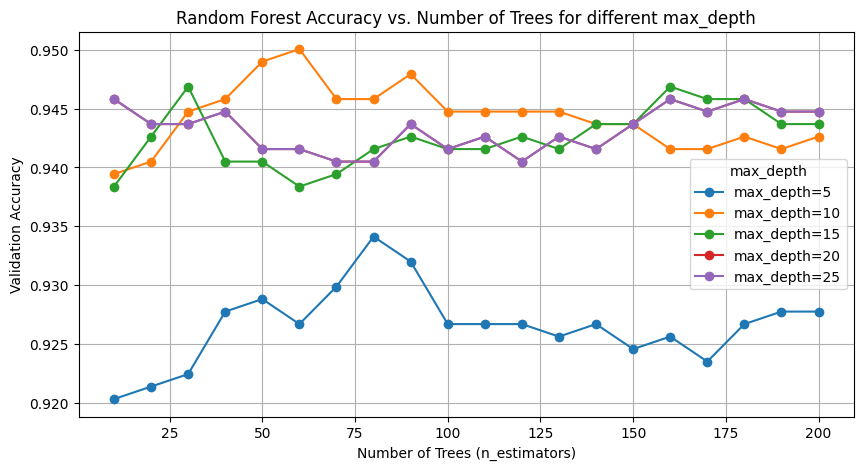

In [86]:
# Finding the best max_depth and n_estimators combination
scores = []

max_depth_values = [5, 10, 15, 20, 25]
n_values = list(range(10, 201, 10))

print("Training models with different max_depth and n_estimators...")
for d in tqdm(max_depth_values, desc="Max Depth"):
    rf = RandomForestClassifier(n_estimators=best_n_estimators,
                               max_depth=d,
                               random_state=42,
                               n_jobs=-1,
                               warm_start=True)

    for n in tqdm(n_values, desc=f"n_estimators (max_depth={d})"):
        rf.n_estimators = n
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        score = accuracy_score(y_val, y_pred)

        scores.append((d, n, score))

# Convert results to DataFrame
columns = ['max_depth', 'n_estimators', 'accuracy']
df_scores = pd.DataFrame(scores, columns=columns)

# Find the best combination of max_depth and n_estimators
best_model = df_scores.loc[df_scores['accuracy'].idxmax()]
best_max_depth = best_model['max_depth']
best_n_estimators = best_model['n_estimators']
best_accuracy = best_model['accuracy']

print(f"\nBest max_depth: {best_max_depth} and n_estimators: {best_n_estimators} with accuracy: {best_accuracy:.4f}")

# Plot results for max_depth and accuracy
plt.figure(figsize=(10, 5))
for d in max_depth_values:
    subset = df_scores[df_scores['max_depth'] == d]
    plt.plot(subset['n_estimators'], subset['accuracy'], marker='o', label=f"max_depth={d}")

plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Validation Accuracy")
plt.title("Random Forest Accuracy vs. Number of Trees for different max_depth")
plt.legend(title="max_depth")
plt.grid(True)
plt.show()

In [92]:
# Training Random Forest Model with best max_depth and n_estimators
rf = RandomForestClassifier(
    n_estimators=int(best_n_estimators), 
    max_depth=int(best_max_depth), 
    random_state=42, 
    n_jobs=-1
    )

rf.fit(X_train, y_train)
     

RandomForestClassifier(max_depth=10, n_estimators=60, n_jobs=-1,
                       random_state=42)

In [144]:
y_pred = rf.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("ROC AUC:", roc_auc_score(y_val, y_pred))

Accuracy: 0.9426142401700319
ROC AUC: 0.9412530847271731


In [95]:
# Inspecting feature importances
rf.feature_importances_

array([0.01239592, 0.01751346, 0.02161587, 0.04525436, 0.0200737 ,
       0.02361439, 0.02206843, 0.02301634, 0.02268133, 0.15445881,
       0.02104658, 0.01751252, 0.1524085 , 0.03264203, 0.06982045,
       0.30544988, 0.03842742])

In [96]:
df_importances = pd.DataFrame()
df_importances['feature'] = dv.feature_names_
df_importances['importance'] = rf.feature_importances_
df_importances

,feature,importance
0,%D14,0.012396
1,%D7,0.017513
2,%K14,0.021616
3,%K30,0.045254
4,%K7,0.020074
5,EMA14,0.023614
6,EMA30,0.022068
7,EMA7,0.023016
8,MOM14,0.022681
9,MOM30,0.154459


In [97]:
# Sorting features by importance
df_importances.sort_values(by='importance', ascending=False).head()

,feature,importance
15,RSI30,0.305450
9,MOM30,0.154459
12,ROC30,0.152408
14,RSI14,0.069820
3,%K30,0.045254


#### XGBoot

In [159]:
# Converting to XGBoost format
features = dv.feature_names_

regex = re.compile(r"<", re.IGNORECASE)
features = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in features]

dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

# Initializing watchlist
watchlist = [(dtrain, 'train'), (dval, 'val')]
scores = {}

In [161]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 10,
    'min_child_weight': 2,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=1, evals=watchlist)


In [162]:
y_pred = model.predict(dval)
print("ROC AUC:", roc_auc_score(y_val, y_pred))

ROC AUC: 0.9945388904122109


In [166]:
print(output.stdout)

[0]	train-auc:0.98669	val-auc:0.97239
[1]	train-auc:0.99325	val-auc:0.97782
[2]	train-auc:0.99594	val-auc:0.98299
[3]	train-auc:0.99725	val-auc:0.98416
[4]	train-auc:0.99831	val-auc:0.98456
[5]	train-auc:0.99868	val-auc:0.98510
[6]	train-auc:0.99897	val-auc:0.98544
[7]	train-auc:0.99914	val-auc:0.98599
[8]	train-auc:0.99938	val-auc:0.98686
[9]	train-auc:0.99953	val-auc:0.98833
[10]	train-auc:0.99966	val-auc:0.98870
[11]	train-auc:0.99971	val-auc:0.98908
[12]	train-auc:0.99978	val-auc:0.98943
[13]	train-auc:0.99983	val-auc:0.98998
[14]	train-auc:0.99989	val-auc:0.99045
[15]	train-auc:0.99992	val-auc:0.99118
[16]	train-auc:0.99995	val-auc:0.99113
[17]	train-auc:0.99997	val-auc:0.99120
[18]	train-auc:0.99998	val-auc:0.99154
[19]	train-auc:0.99999	val-auc:0.99162
[20]	train-auc:0.99999	val-auc:0.99150
[21]	train-auc:0.99999	val-auc:0.99162
[22]	train-auc:0.99999	val-auc:0.99192
[23]	train-auc:1.00000	val-auc:0.99203
[24]	train-auc:1.00000	val-auc:0.99212
[25]	train-auc:1.00000	val-auc:0.99

In [167]:
# Parsing XGBoost output
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [168]:
df_scores = parse_xgb_output(output)
df_scores

,num_iter,train_auc,val_auc
0,0,0.98669,0.97239
1,1,0.99325,0.97782
2,2,0.99594,0.98299
3,3,0.99725,0.98416
4,4,0.99831,0.98456
...,...,...,...
95,95,1.00000,0.99454
96,96,1.00000,0.99456
97,97,1.00000,0.99454
98,98,1.00000,0.99453


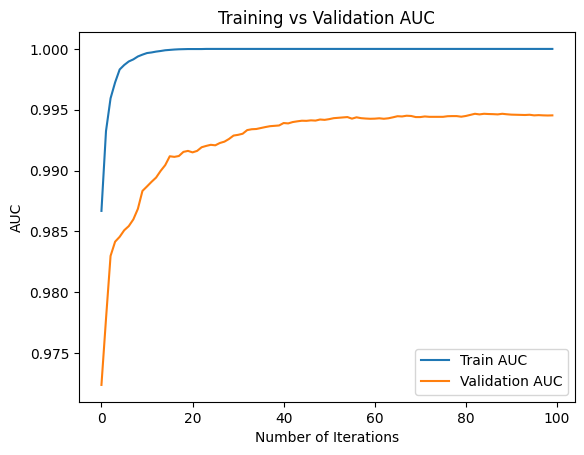

In [171]:
import matplotlib.pyplot as plt

# Plotting the AUC for both train and validation sets
plt.plot(df_scores.num_iter, df_scores.train_auc, label='Train AUC')
plt.plot(df_scores.num_iter, df_scores.val_auc, label='Validation AUC')

plt.title('Training vs Validation AUC')
plt.xlabel('Number of Iterations')
plt.ylabel('AUC')

plt.legend()
plt.show()

In [172]:
# Storing results
scores['eta=0.3'] = parse_xgb_output(output)

In [173]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 10,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=1, evals=watchlist)


In [195]:
y_pred = model.predict(dval)
print("ROC AUC:", roc_auc_score(y_val, y_pred))

ROC AUC: 0.9951649757791793


In [175]:
scores['eta=0.1'] = parse_xgb_output(output)

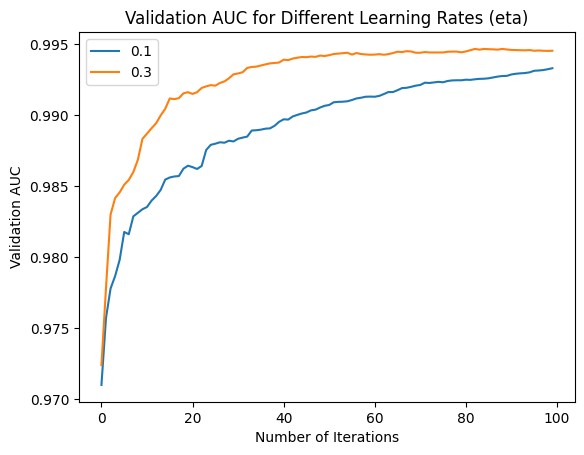

In [176]:
plt.plot(scores['eta=0.1'].num_iter, scores['eta=0.1'].val_auc, label='0.1')
plt.plot(scores['eta=0.3'].num_iter, scores['eta=0.3'].val_auc, label='0.3')

# Adding title and labels for clarity
plt.title('Validation AUC for Different Learning Rates (eta)')
plt.xlabel('Number of Iterations')
plt.ylabel('Validation AUC')

plt.legend()
plt.show()

In [185]:
scores = {}

In [192]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 20,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=1, evals=watchlist)

In [193]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)

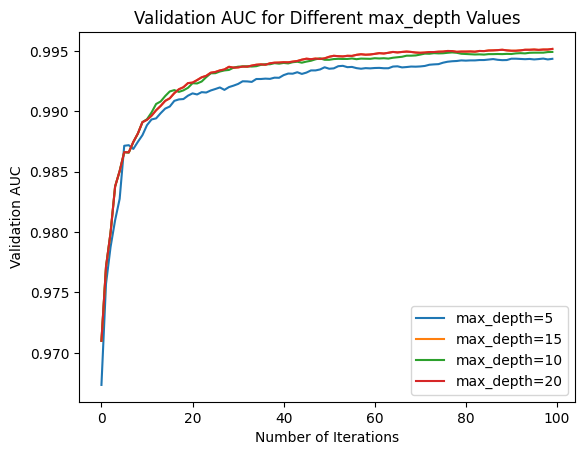

In [196]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

plt.title('Validation AUC for Different max_depth Values')
plt.xlabel('Number of Iterations')
plt.ylabel('Validation AUC')
plt.legend()
plt.show()

### Final model

In [197]:
# Creating train/test split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)

df_train_full = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

len(df_train_full), len(df_test)

(2821, 753)

In [198]:
y_train_full = df_train_full.signals.values
y_test = df_test.signals.values

In [199]:
train_dict = df_train_full[features].to_dict(orient="records")
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)

test_dict = df_test[features].to_dict(orient='records')
X_test = dv.transform(test_dict)

In [200]:
# Creating DMatrices
features = dv.feature_names_

regex = re.compile(r"<", re.IGNORECASE)
features = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in features]

dtrain = xgb.DMatrix(X_train, label=y_train_full, feature_names=features)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=features)

In [201]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 10,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=1)

In [202]:
y_pred = model.predict(dtest)
print("ROC AUC:", roc_auc_score(y_test, y_pred))

ROC AUC: 0.9951767110171066


### Saving the model

In [203]:
import joblib

joblib.dump(dv, 'dv.pkl')
joblib.dump(model, 'xgb_model.pkl')

['xgb_model.pkl']